In [4]:
import os
import sys
import argparse
from os.path import dirname, realpath

sys.path.append("./src/")
sys.path.append(dirname(dirname(realpath(os.getcwd()))))
%run load_Results.py
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_regression
from sklearn.isotonic import IsotonicRegression
#!pip install ml_insights
import ml_insights as mli

y01, p01 = calibration_curve(M_test1['golds'], tp1, n_bins = 20)
y02, p02 = calibration_curve(M_test2['golds'], tp2 , n_bins = 20)
y03, p03 =calibration_curve(M_test3['golds'], tp3 , n_bins = 20)
y04, p04 = calibration_curve(M_test4['golds'], tp4 , n_bins = 20)


In [84]:
from betacal import BetaCalibration
from  scipy.stats import beta
from matplotlib.pyplot import figure 
from  scipy.stats import norm
from scipy import stats as stats


In [6]:
neg_1 = mp1 [np.where(M1['golds']==0)]
neg_2 = mp2 [np.where(M2 ['golds']==0)]
neg_3 = mp3 [np.where(M3 ['golds']==0)]
neg_4 = mp4 [np.where(M4 ['golds']==0)]
pos_1 = mp1 [np.where(M1 ['golds']==1)]
pos_2 = mp2 [np.where(M2 ['golds']==1)]
pos_3 = mp3 [np.where(M3['golds']==1)]
pos_4 = mp4 [np.where(M4 ['golds']==1)]
### TRY BETA

In [7]:
pos = pos_1 
subneg=np.random.choice(neg_1, 40*sum(gold1))
p_test = tp1
y_test= M_test1['golds']
synth_size=5

In [31]:
def temp_scaling (logits, y, wts):
    def temperature_obj(t):
        temp_logits =   logits  / t [0]   +t[1]
        probs =   expit(temp_logits)
        return log_loss(y, probs, sample_weight=wts)    
    res = minimize (temperature_obj,x0 = [.1,.1])
    return res.x

def temp_pred (alpha,  test_logit):    
    logi =  test_logit / alpha[0]   + alpha[1]
    proba =   expit ( logi   )  
    return proba

In [9]:
def temp_smote_plot(pos, subneg, p_test, y_test, 
               synth_size, wei):
        
    a, b, loc, scale = beta.fit(pos  , floc=0, fscale=1)
    synth_pos = np.random.beta(a,b,size = int( len(pos)*synth_size ))
    many_pos = np.concatenate((pos, synth_pos))
    probs = np.concatenate((subneg, many_pos))
    subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )
    weights =  np.ones(len(subgold))
    weights = np.where(subgold==1, wei ,1)

    #alpha =  temp_scaling ( (probs),subgold, weights )
    #temp_test = temp_pred(  alpha,    (p_test ))

    alpha =  temp_scaling (logit(probs),subgold, weights )
    temp_test = temp_pred(  alpha,   logit (p_test ))

    figure (figsize=(2.5,2.5))
    #normalized_temp_test = temp_test/ np.max(temp_test)
    mli.plot_reliability_diagram(y_test,  temp_test)
    return temp_test

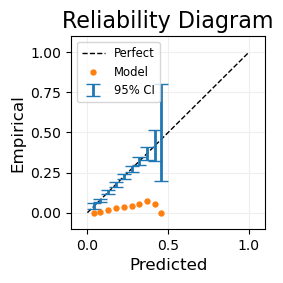

In [10]:
temp1 = temp_smote_plot(pos_1, subneg=np.random.choice(neg_1, 100*sum(gold1)),
           p_test = tp1, y_test= M_test1['golds'],   synth_size=25, wei=1)

array([0.09768995, 0.07364848, 0.1164322 , ..., 0.11734521, 0.09842284,
       0.15561681])

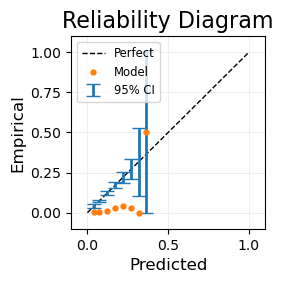

In [11]:
temp_smote_plot(pos_3, subneg=np.random.choice(neg_3, 60*sum(gold3)),
           p_test = tp3, y_test= M_test3['golds'],   synth_size=25, wei=.3)

array([0.03750092, 0.0201829 , 0.09313705, ..., 0.03687397, 0.03900998,
       0.05567483])

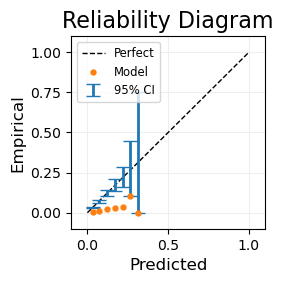

In [12]:
temp_smote_plot(pos_4, subneg=np.random.choice(neg_4, 50*sum(gold4)),
           p_test = tp4, y_test= M_test4['golds'],   synth_size=10, wei=.3)

In [99]:
def temp_scaling (logits, y, wts):
    def temperature_obj(t):
        temp_logits =   logits  / t [0]   +t[1]
        probs =    expit(temp_logits)
        return log_loss(y, probs, sample_weight=wts)    
    res = minimize (temperature_obj,x0 = [.1,.1])
    return res.x

def temp_pred (alpha,  test_logit):    
    logi =  test_logit / alpha[0]    + alpha[1]
    proba =     expit( logi   )  
    return proba

In [101]:
def temp_smote(pos, subneg, p_test,
               synth_size, wei):
        
    #a, b, loc, scale = beta.fit(pos) #, floc=0, fscale=.5)
    #synth_pos = np.random.beta(a,b,size = int( len(pos)*synth_size ))
    mu, sig = norm.fit (logit(pos))
    synth_pos = np.random.normal(mu,sig,size = int( len(pos)*synth_size ))

    many_pos = np.concatenate((pos, expit(synth_pos)))
    probs = np.concatenate((subneg, many_pos))
    subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )
    weights = np.where(subgold==1, wei ,1)

    alpha =  temp_scaling ( logit(probs),subgold, weights )
    temp_test = temp_pred(  alpha,    logit(p_test ))
    return temp_test

In [117]:
I1 = []
for i in range(60):
    I1.append(temp_smote( pos_1, subneg=np.random.choice(neg_1, 50*sum(gold1)),  
                p_test = tp1,   synth_size=10, wei = 1))

In [126]:
I3 = []
for i in range(100):
    I3.append(temp_smote(pos_3, subneg=np.random.choice(neg_3, 50*sum(gold3)),  
                p_test = tp3,   synth_size=10, wei = 2))

In [127]:
I4 = []
for i in range(50):
    I4.append(temp_smote(pos_4, subneg=np.random.choice(neg_4, 20*sum(gold4)),
            p_test = tp4 ,  synth_size=10, wei = 4))

{'pred_probs': array([0.0899294 , 0.12786235, 0.17625277, 0.22533611, 0.27505358,
        0.32588404, 0.37612501, 0.42573561, 0.47627205, 0.52580014,
        0.5743457 , 0.62460893, 0.673229  , 0.72066747, 0.76731076,
        0.80786152]),
 'emp_probs': array([0.        , 0.        , 0.0035461 , 0.00657895, 0.00603865,
        0.01020408, 0.01702128, 0.02573018, 0.02893519, 0.02855686,
        0.03920544, 0.04230118, 0.05174731, 0.0593505 , 0.08333333,
        0.        ]),
 'bin_counts': array([  66.,  371.,  564.,  760.,  828.,  980., 1175., 1438., 1728.,
        1961., 1913., 1773., 1488.,  893.,  180.,   14.])}

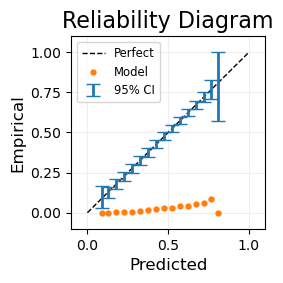

In [116]:
IM1 = np.array( [l for l in I1])
MaxI1 = IM1.mean(0)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test1['golds'],  MaxI1)

{'pred_probs': array([0.04830635, 0.08187597, 0.12587559, 0.17439782, 0.22483642,
        0.27369284, 0.32446393, 0.37445387, 0.42404258, 0.47270422,
        0.52408848, 0.57151555, 0.62208163, 0.67188585, 0.71616336,
        0.77195876, 0.80073508]),
 'emp_probs': array([0.        , 0.00226244, 0.00363259, 0.00620797, 0.0071116 ,
        0.00851343, 0.01353503, 0.01578947, 0.02190722, 0.02715655,
        0.03539823, 0.04081633, 0.03092784, 0.03875969, 0.        ,
        0.14285714, 0.        ]),
 'bin_counts': array([4.000e+00, 8.840e+02, 1.927e+03, 1.933e+03, 1.828e+03, 1.527e+03,
        1.256e+03, 9.500e+02, 7.760e+02, 6.260e+02, 4.520e+02, 2.940e+02,
        1.940e+02, 1.290e+02, 4.100e+01, 7.000e+00, 1.000e+00])}

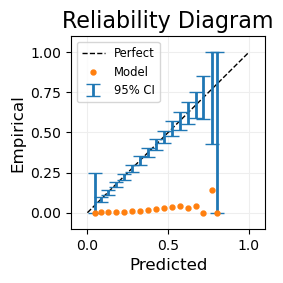

In [128]:
IM3 = np.array( [l for l in I3])
MaxI3 = IM3.mean(0)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test3['golds'],  MaxI3)

In [122]:
Trim1_b = stats.tmean (IM1, (.05, .95), axis=0)

In [123]:
Trim3_b = stats.tmean (IM3, (.05, .95), axis=0)

d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_stats_py.py:610: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis)


{'pred_probs': array([0.0899294 , 0.12786235, 0.17625277, 0.22533611, 0.27505358,
        0.32588404, 0.37612501, 0.42573561, 0.47627205, 0.52580014,
        0.5743457 , 0.62460893, 0.673229  , 0.72066747, 0.76731076,
        0.80786152]),
 'emp_probs': array([0.        , 0.        , 0.0035461 , 0.00657895, 0.00603865,
        0.01020408, 0.01702128, 0.02573018, 0.02893519, 0.02855686,
        0.03920544, 0.04230118, 0.05174731, 0.0593505 , 0.08333333,
        0.        ]),
 'bin_counts': array([  66.,  371.,  564.,  760.,  828.,  980., 1175., 1438., 1728.,
        1961., 1913., 1773., 1488.,  893.,  180.,   14.])}

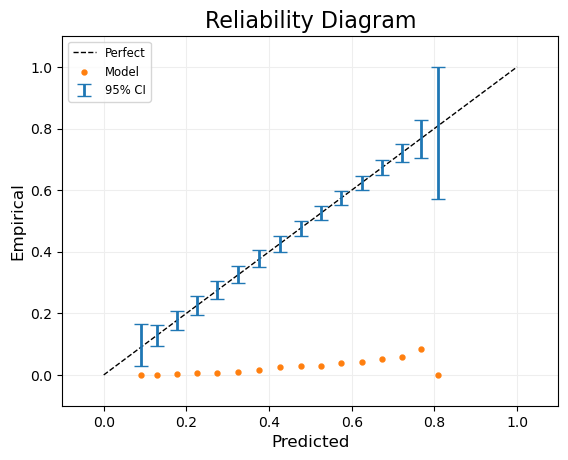

In [124]:
mli.plot_reliability_diagram(M_test1['golds'],  Trim1_b)

{'pred_probs': array([0.07050391, 0.12173282, 0.17193866, 0.22164214, 0.27245149,
        0.32182902, 0.36612272, 0.42678257, 0.46736964,        nan]),
 'emp_probs': array([0.00733732, 0.01413882, 0.02627119, 0.04123711, 0.03100775,
        0.02962963, 0.02325581, 0.        , 0.5       , 0.00418275]),
 'bin_counts': array([5.179e+03, 2.334e+03, 1.180e+03, 5.820e+02, 2.580e+02, 1.350e+02,
        4.300e+01, 8.000e+00, 2.000e+00, 3.108e+03])}

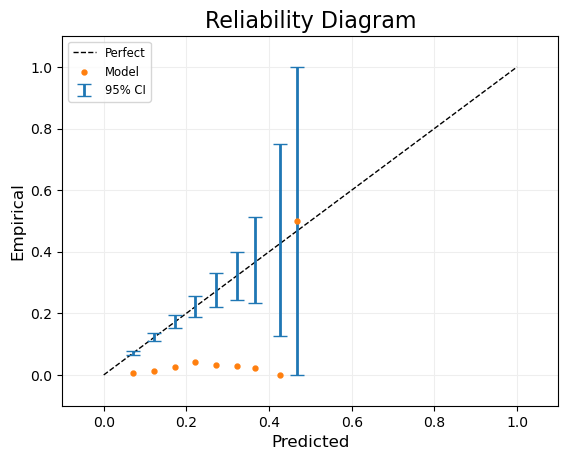

In [125]:
mli.plot_reliability_diagram(M_test3['golds'],  Trim3_b)

In [ ]:
def temp_scaling (logits, y, wts):
    def temperature_obj(t):
        temp_logits =   logits  /  t [0]  # +t[1]
        probs =  expit(temp_logits)
        return log_loss(y, probs, sample_weight=wts)    
    res = minimize (temperature_obj,x0 = [.1,.1])
    return res.x

def temp_pred (alpha,  test_logit):    
    logi =  test_logit / alpha[0]   #+ alpha[1]
    proba =  expit ( logi   )  
    return proba

In [ ]:
def temp_smote_plot(pos, subneg, p_test, y_test, 
               synth_size, wei):
        
    a, b, loc, scale = beta.fit(pos, floc=0, fscale=1)
    synth_pos = np.random.beta(a,b,size = int( len(pos)*synth_size ))
    many_pos = np.concatenate((pos, synth_pos))
    probs = np.concatenate((subneg, many_pos))
    subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )
    weights =  np.ones(len(subgold))
    weights = np.where(subgold==1, wei ,1)

    #alpha =  temp_scaling ( (probs),subgold, weights )
    #temp_test = temp_pred(  alpha,    (p_test ))

    alpha =  temp_scaling (logit(probs),subgold, weights )
    temp_test = temp_pred(  alpha,   logit(p_test ))

    figure (figsize=(2.5,2.5))
    mli.plot_reliability_diagram(y_test,  temp_test)
    return temp_test